In [1]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv (r'./jenny2.txt', sep = '\t')
df

,Time,EMG,Muscle Force
0,0.000,0.000000,0.230229
1,0.001,0.000000,0.230229
2,0.002,0.000000,0.230229
3,0.003,0.000000,0.230229
4,0.004,0.000000,0.229858
...,...,...,...
55963,55.963,0.102703,0.230229
55964,55.964,-0.004144,0.230229
55965,55.965,-0.157290,0.230229
55966,55.966,-0.130544,0.230229


Text(0, 0.5, 'EMG (Volts)')

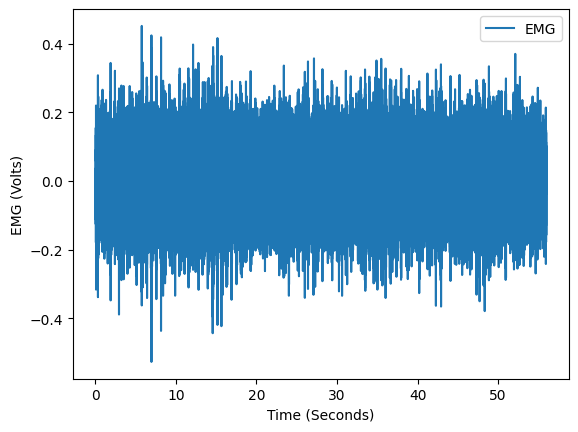

In [4]:
fig, ax = plt.subplots()
df.plot.line(ax = ax, y = 'EMG', x = 'Time')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (Volts)")

In [5]:
# Define the parameters
window_size = 3  # Window size in seconds (how large of a window you want to take the avg max of)
step_size = 10  # Step size in seconds (how often you want to check the window size)

In [6]:
# Initialize lists to store the calculated max values
max_values = []
time_intervals = []

# Iterate through the data in steps
for i in range(0, len(df), int(step_size / 0.001)):
    start_idx = i
    end_idx = start_idx + int(window_size / 0.001)

    if end_idx < len(df):
        window_data = df.iloc[start_idx:end_idx]
        max_value = window_data['EMG'].max()
        max_values.append(max_value)

        # Calculate the time interval (take the midpoint of the window)
        time_interval = window_data['Time'].mean()
        time_intervals.append(time_interval)

# Create a new DataFrame with the calculated max values and time intervals
result_df = pd.DataFrame({'Time': time_intervals, 'MaxEMG': max_values})

# Calculate the percentage of max EMG for each 0.5 seconds interval
result_df['MaxEMG_percent'] = (result_df['MaxEMG'] / result_df['MaxEMG'].max()) * 100

# Display the result
print(result_df)

      Time    MaxEMG  MaxEMG_percent
0   1.4995  0.344011       86.527322
1  11.4995  0.397575      100.000000
2  21.4995  0.278010       69.926429
3  31.4995  0.321118       80.769163
4  41.4995  0.339897       85.492549
5  51.4995  0.370380       93.159781


In [7]:
threshold = 70

In [8]:
reached_threshold = result_df[result_df['MaxEMG_percent'] <= threshold]
time_at_threshold = reached_threshold['Time'].iloc[0]
print(f"Time at ~{threshold} % of max: {time_at_threshold} seconds")

Time at ~70 % of max: 21.4995 seconds


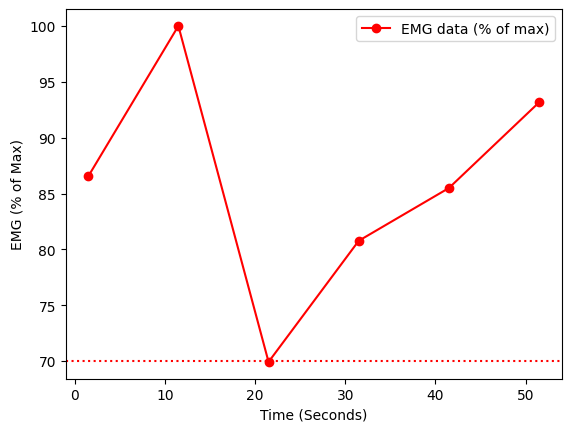

In [9]:
fig, ax = plt.subplots()
result_df.plot.line(ax = ax, y = 'MaxEMG_percent', x = 'Time', color = 'r', marker = 'o')
L=plt.legend()
L.get_texts()[0].set_text('EMG data (% of max)')
ax.set_xlabel("Time (Seconds)")
ax.set_ylabel("EMG (% of Max)")
plt.axhline(threshold, color='red', ls='dotted')